# 프로젝트
## 개요
영화 시놉시스 코퍼스를 이용해, 영화 장르에 따른 상업-예술영화의 표현 편향성을 측정한다.

## 순서
- STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기
- STEP 2. 전체 시놉시스 데이터로 추출한 결과로 embedding model 만들기
- STEP 3. target, attribute 단어 셋 만들기
- STEP 4. WEAT score 계산과 시각화

## 달성 목표
### 1. 주어진 영화 코퍼스를 바탕으로 워드임베딩 모델 구축
- 워드임베딩의 most_similar() 메소드 결과가 의미상 바르게 나와야 한다.

### 2. 영화 구분, 장르별로 target, attribute에 대한 대표성있는 단어 셋을 생성
-	타당한 방법론을 통해 중복이 잘 제거되고 개념축을 의미적으로 잘 대표하는 단어 셋 구축

### 3. WEAT score 계산 및 시각화
- 전체 영화 장르별로 예술/일반 영화에 대한 편향성 WEAT score가 상식에 부합하는 수치로 얻어졌으며 이를 잘 시각화

## 영화 시놉시스 데이터 토크나이징

In [ ]:
! pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 51.3 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
import threading
import os

class TextTokenizer:
    def __init__(self, data_path):
        self.data_path = data_path
        self.file_names = []

    def tokenize_file(self, file_name, results, tokenizer, file_index, total_files):
        """
        주어진 파일을 토크나이징하는 메서드.

        :param file_name: 토크나이징할 파일 이름.
        :param results: 결과를 저장할 딕셔너리.
        :param tokenizer: 사용할 토크나이저 인스턴스.
        :param file_index: 현재 처리 중인 파일의 인덱스.
        :param total_files: 전체 파일 수.
        """
        print(f"📄 파일 {file_index + 1}/{total_files} 토크나이징 중: {file_name}")
        with open(os.path.join(self.data_path, file_name), 'r', encoding='utf-8') as fread:
            lines = fread.readlines()

        result = []
        for line in lines:
            tokenlist = tokenizer.pos(line, stem=True, norm=True)
            result.extend([word[0] for word in tokenlist if word[1] == "Noun"])

        results[file_name] = ' '.join(set(result))  # 중복 제거
        print(f"✅ 파일 토크나이징 완료: {file_name}")

    def read_and_tokenize(self, file_list):
        tokenizer = Okt()  # Okt 인스턴스 생성
        results = {}
        threads = []
        total_files = len(file_list)

        for file_index, file_name in enumerate(file_list):
            self.file_names.append(os.path.splitext(file_name)[0])
            thread = threading.Thread(target=self.tokenize_file, args=(file_name, results, tokenizer, file_index, total_files))
            threads.append(thread)
            thread.start()

        for thread in threads:
            thread.join()

        return results

In [ ]:
# 모든 파일 토크나이징
data_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_Research_6th/going_deeper/07-09_Embedded_bias/synopsis'
genre_files = ['synopsis.txt', 'synopsis_art.txt', 'synopsis_gen.txt', 'synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt',
    'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt',
    'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt',
    'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt',
    'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']

tokenizer = TextTokenizer(data_path)
tokenized_data = tokenizer.read_and_tokenize(genre_files)

📄 파일 1/24 토크나이징 중: synopsis.txt
📄 파일 2/24 토크나이징 중: synopsis_art.txt
📄 파일 3/24 토크나이징 중: synopsis_gen.txt
📄 파일 4/24 토크나이징 중: synopsis_SF.txt
📄 파일 5/24 토크나이징 중: synopsis_family.txt
📄 파일 6/24 토크나이징 중: synopsis_show.txt
📄 파일 7/24 토크나이징 중: synopsis_horror.txt
📄 파일 8/24 토크나이징 중: synopsis_etc.txt
📄 파일 9/24 토크나이징 중: synopsis_documentary.txt
📄 파일 10/24 토크나이징 중: synopsis_drama.txt
📄 파일 11/24 토크나이징 중: synopsis_romance.txt
📄 파일 12/24 토크나이징 중: synopsis_musical.txt
📄 파일 13/24 토크나이징 중: synopsis_mystery.txt
📄 파일 14/24 토크나이징 중: synopsis_crime.txt
📄 파일 15/24 토크나이징 중: synopsis_historical.txt
📄 파일 16/24 토크나이징 중: synopsis_western.txt
📄 파일 17/24 토크나이징 중: synopsis_adult.txt
📄 파일 18/24 토크나이징 중: synopsis_thriller.txt
📄 파일 19/24 토크나이징 중: synopsis_animation.txt
📄 파일 20/24 토크나이징 중: synopsis_action.txt
📄 파일 21/24 토크나이징 중: synopsis_adventure.txt
📄 파일 22/24 토크나이징 중: synopsis_war.txt
📄 파일 23/24 토크나이징 중: synopsis_comedy.txt
📄 파일 24/24 토크나이징 중: synopsis_fantasy.txt
✅ 파일 토크나이징 완료: synopsis_western.txt
✅ 파일 토크나이징 완료: syno

In [ ]:
import json

# 결과를 JSON 파일로 저장하는 함수
def save_tokenized_data(data, file_path):
    with open(file_path, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

# 저장할 파일 경로
tokenized_data_path = os.path.join(data_path, 'tokenized_data.json')

# 토크나이징 결과 저장
save_tokenized_data(tokenized_data, tokenized_data_path)

In [ ]:
# JSON 파일에서 데이터를 불러오는 함수
def load_tokenized_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return json.load(f)

# 저장된 데이터 불러오기
loaded_data = load_tokenized_data(tokenized_data_path)

In [ ]:
loaded_data['synopsis.txt']

'톰슨 쉬보 텐구 송금 김민수 초치 박산 인두 수온 유건 대중운동 구획 단역 퍼객스 토라 식품 오이 성폭력 재는 폐품 미르블 제목 디렉션 정시 빈부격차 다문화 초등학생 철면 고리 투하 이유 에테르 산룽 보웬 쿵쾅 봉무 마태오 대런 뒤끝 츠쿠 번뇌 은순 희곡작가 행각 집주인 해난 이리스 만년설 주검 숙진 운동경기 아프로디테 장갑차 탄호이저 가고시마 혼혈 모큐멘터리 밥그릇 아케이드 경찰견 스카우트 작부 스케쥴 아주머니 제비집 크레이터 쇼 찜질방 태임 티브 성경책 카오리 로맨틱 처사 구토 귀부인 른채 성병 타츠오 동맹 카포네 반찬거리 맨 아피찻퐁 이도경 협싱증 백장미 통속 순록 계시록 디리그 돆 경계 일시 아보 고델 접시 콘 샛강 잡지사 예정일 얼핏 먹음 고슴도치 로프 남두 위즈 영하 아바도 소린 기절놀이 재일조선인 삼장 제압 루 불개미 할리데이 볼란칙 이기대 가람 애국지사 폐관 부주 임무 최훈 후기 유카탄 국방부 급성 골드미스 태평도 자녀 필재 김민영 기차표 에밋 윌로씨 예언자 통차 탑재 홍록기 김두현 가슴속 소각 미국 영구차 납 페니스 슈라이버 캥거루 캉캉 자판 고충 킨이치 티드 꾸러기 스탠퍼드 재건축 그리니치빌리지 락큰롤 에브게 판텔레온 피콜로 달맞이 주둔지 휩 대종 알람시계 신예 아마겟돈 미야꼬 파텔 크리스탈 사설탐정 가동 차야 그린 연유 마르코스 포섭 계집애 스티커 민석 처절 오텍티오 예비역 콘클라베 데 아예 레바 범위 십자 취재원 칸델라 성함 북궁 기점 코페르니쿠스 약어 봉알 푸조나무 겐 비텐베르크 어렴풋 또띠아 추가골 관서 김영우 워리어스 카보베르데 닭꼬치 이동규 급유 콩팥 화이트스크린 수술실 주거 허울 최우식 양식 값어치 중모 다우니 사코 날갯짓 방학식 결제 알받이 원칙 중세시대 쿠프슈타인 밀턴 가식 책상다리 회사원 엠마 최루탄 상중 준홍 딴판 인터내셔널가 링컨 클라우드 인스톨레이션 호흡 신세계 유선 부정합 휘발 세아 가체 포리너 삶 레니 용덕 황산 허밍 부내 베스파 단막극 퍼나우 투믹스 군왕 사라방드 심성 윤용현 크메르 수족구병 탭 주먹질 닌털리티 

In [ ]:
tokenized_data = loaded_data

## 전체 시놉시스 토큰으로 Word2Vec 임베딩 만들고 작동여부 확인

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec


def create_word2vec_model(data_path, file_name, vector_size=100, window=5, min_count=3, sg=0, include_pos=["Noun"]):
    """
    주어진 데이터 파일로부터 Word2Vec 모델을 생성하고 반환합니다.

    :param data_path: 텍스트 데이터 파일이 위치한 폴더의 경로.
    :param file_name: 텍스트 데이터 파일의 이름.
    :param vector_size: 임베딩 벡터의 차원.
    :param window: Word2Vec 모델의 컨텍스트 윈도우 크기.
    :param min_count: 단어 최소 빈도수 제한 (이보다 적게 나타나는 단어는 무시).
    :param sg: 0이면 CBOW, 1이면 Skip-gram.
    :param include_pos: 포함할 품사 목록.
    :return: 훈련된 Word2Vec 모델.
    """
    okt = Okt()
    tokenized_synopsis = []

    full_path = os.path.join(data_path, file_name)  # 데이터 파일의 전체 경로 생성

    with open(full_path, 'r', encoding='utf-8') as file:
        while True:
            line = file.readline()
            if not line: break
            words = okt.pos(line, stem=True, norm=True)
            res = [w[0] for w in words if w[1] in include_pos]
            tokenized_synopsis.append(res)

    model = Word2Vec(tokenized_synopsis, vector_size=vector_size, window=window, min_count=min_count, sg=sg)

    return model

In [ ]:
file_name = 'synopsis.txt'  # 파일 이름
model = create_word2vec_model(data_path, file_name)
vocabulary = list(model.wv.index_to_key)
print(vocabulary)

['그', '것', '이', '자신', '그녀', '수', '영화제', '제', '위해', '시작', '사람', '날', '국제', '사랑', '영화', '친구', '집', '남자', '알', '속', '이야기', '의', '두', '일', '곳', '살', '대한', '여자', '사건', '삶', '서울', '중', '가족', '후', '아이', '아버지', '은', '남편', '전', '말', '마을', '엄마', '다른', '를', '모든', '시간', '마음', '때', '아들', '위', '다시', '못', '세상', '서로', '사실', '단편', '세계', '딸', '더', '모습', '소녀', '통해', '아내', '발견', '생각', '사이', '감독', '둘', '온', '작품', '하나', '안', '앞', '우리', '관계', '과연', '세', '꿈', '뒤', '돈', '향', '나', '때문', '등', '점점', '채', '죽음', '모두', '생활', '눈', '애니메이션', '한편', '밤', '여성', '결혼', '기억', '상황', '가장', '여행', '소년', '인간', '순간', '명의', '비밀', '간다', '도시', '학교', '몸', '구', '이제', '과거', '마지막', '이자', '전쟁', '경찰', '분', '가지', '미국', '길', '인생', '코', '동안', '사고', '현실', '존재', '일상', '내', '최고', '살인', '주인공', '어머니', '위기', '끝', '대해', '과', '계속', '또', '이후', '아빠', '사회', '동생', '로', '다큐멘터리', '하루', '한국', '음악', '차', '정체', '계획', '바로', '처음', '조직', '명', '연출', '결심', '운명', '보고', '회사', '감정', '준비', '부부', '섹스', '누구', '적', '문제', '일본', '할머니', '만난', '부문', '무엇', '로부터', '부산', '팀', '

In [ ]:
def save_word2vec_model(model, data_path, model_name):
    """
    Word2Vec 모델을 지정된 경로에 저장합니다.

    :param model: 저장할 Word2Vec 모델.
    :param data_path: 모델을 저장할 폴더의 경로.
    :param model_name: 저장할 모델의 파일 이름 (확장자 없이).
    """
    model_file_path = os.path.join(data_path, model_name + ".model")
    model.save(model_file_path)
    print(f"모델이 '{model_file_path}'에 저장되었습니다.")

# 모델 저장
save_word2vec_model(model, data_path, "word2vec_synopsis")

모델이 '/content/drive/MyDrive/Colab Notebooks/AIFFEL_Research_6th/going_deeper/07-09_Embedded_bias/synopsis/word2vec_synopsis.model'에 저장되었습니다.


In [ ]:
# '사랑'과 가장 유사한 단어들 찾기
similar_words = model.wv.most_similar(positive=['사랑'])

print(similar_words)

[('첫사랑', 0.7006914019584656), ('애정', 0.7000912427902222), ('행복', 0.6914228200912476), ('시빌라', 0.685133695602417), ('이별', 0.6842939853668213), ('진심', 0.6810683012008667), ('만남', 0.6763589382171631), ('연애', 0.6722003221511841), ('고백', 0.6702014803886414), ('우정', 0.6680262684822083)]


## TF-IDF로 각 시놉시스 토큰으로부터 가장 잘 표현하는 단어 셋 만들기

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# art와 gen 데이터 추출
art = tokenized_data['synopsis_art.txt']
gen = tokenized_data['synopsis_gen.txt']

from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_tfidf_and_sort(tokens_1st, tokens_2nd):

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform([tokens_1st, tokens_2nd])

    m1 = X[0].tocoo()
    m2 = X[1].tocoo()

    w1 = sorted([[i, j] for i, j in zip(m1.col, m1.data)], key=lambda x: x[1], reverse=True)
    w2 = sorted([[i, j] for i, j in zip(m2.col, m2.data)], key=lambda x: x[1], reverse=True)

    return w1, w2, vectorizer

def extract_unique_words(w1, w2, vectorizer, model, top_n=15):
    w1_words = [vectorizer.get_feature_names_out()[i[0]] for i in w1[:100]]
    w2_words = [vectorizer.get_feature_names_out()[i[0]] for i in w2[:100]]

    target_art = [word for word in w1_words if word not in w2_words and word in model.wv][:top_n]
    target_gen = [word for word in w2_words if word not in w1_words and word in model.wv][:top_n]

    return target_art, target_gen

In [ ]:
w1, w2, vectorizer = calculate_tfidf_and_sort(art, gen)

# 100개 단어 확인
print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w1[i][0]], end=', ')

print('\n\n일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
어핀, 형신, 코벳, 풍채, 에큐메니컬, 테마음악, 다애, 개런티, 대학교육, 떡집, 전기차, 샤비, 소년법원, 마이크로폰, 완소칠, 이소선, 오초, 키네마준보, 청빈, 스탐, 정산, 노동청, 산업의학, 알파빌, 뢰락, 이나영, 보건복지부, 죽겠네, 변곡점, 오위, 물컹거리, 니켈, 지열, 픽트왕국, 커피집, 쿠즈하, 러브홀릭, 김연, 케림, 늬들, 서량, 딘딘, 마택이, 진부령, 크룰릭, 김종, 히버트, 노틀담, 청년시절, 플로리다주, 임치, 다크라이, 탐엣더팜, 모스타, 프라모델, 후베르트, 밀알, 기습키스, 윤도현, 맹아, 김재민, 하마지, 대성동, 큰길, 김성주, 하나조노, 쇼퍼, 양과자, 군봉, 애설버트, 에이치, 백성현, 양구, 썸녀, 미조레, 쥐류, 총포, 케루, 허조, 페랑, 새누리당, 낭시, 호골, 신동혁, 딘다, 샤시, 수안보, 안성, 땅문서, 구마모토, 테블릿, 서울구치소, 구부, 터브, 계이름, 컨펌, 아르누보, 장펑, 모슬림, 히드로, 

일반영화를 대표하는 단어들:
차돌맹, 시파, 비품, 료마, 나쉬, 북만주, 정한경, 강성진, 취중진담, 세계관, 자맛, 탈당, 심양, 캬스발, 야자유, 건축학개론, 헨드릭, 입력, 도균, 허트스, 아부다비, 켄드라, 하스낫, 청어, 쩍기, 패임, 이윤지, 비상계엄, 산채, 콘텐티, 펜들턴, 핌파룸, 재적, 해양학자, 김기범, 샌즈, 정주, 김영자, 장지림, 볼라벤, 메흐멧, 툴툴거리, 청해, 홍지연, 월식, 파스빈더, 화산대, 결기, 맹만수, 정순, 호제, 넵튠, 카탈, 설법, 이슬라, 공복, 왕도, 아르카, 사일런트, 절세미인, 꿀꺽, 한실, 튜르조, 얄친, 아벡시스, 안드레아스, 철자, 이점, 숏팬츠, 미술가, 보탬, 가리봉, 석공, 임파, 빗장, 전보, 세바, 슈니코프, 인공호흡, 그레텔등, 생계비, 리딤, 아틀란티스, 엄폐, 김향기, 캡쳐, 변수, 데쟈뷰, 와이드, 문물, 신궁, 여주군, 썬더볼트, 부둣가, 스트라우브, 쥐라기, 핀바, 구파발, 하렘, 관계성, 

In [ ]:
target_art, target_gen = extract_unique_words(w1, w2, vectorizer, model)

print('\n\n예술영화에 독특한 단어들:', target_art)
print('일반영화에 독특한 단어들:', target_gen)



예술영화에 독특한 단어들: ['풍채', '다애', '샤비', '이소선', '오초', '정산', '오위', '니켈', '커피집', '케림', '딘딘', '김종', '청년시절', '후베르트', '에이치']
일반영화에 독특한 단어들: ['료마', '세계관', '자맛', '탈당', '캬스발', '헨드릭', '입력', '아부다비', '청어', '산채', '펜들턴', '정주', '청해', '카탈', '아르카']


In [ ]:
print(X.shape)

(2, 41082)


In [ ]:
import threading
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_tfidf_and_sort(text):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform([text])
    m = X[0].tocoo()
    sorted_words = sorted([[i, j] for i, j in zip(m.col, m.data)], key=lambda x: x[1], reverse=True)
    return sorted_words, vectorizer

def extract_representative_words_for_genre(genre_name, text, model):
    print(f"{genre_name} 처리 중...")

    sorted_words, vectorizer = calculate_tfidf_and_sort(text)
    attributes = []

    j = 0
    while len(attributes) < 15 and j < len(sorted_words):
        word = vectorizer.get_feature_names_out()[sorted_words[j][0]]
        if word in model.wv:
            attributes.append(word)
        j += 1

    print(f"{genre_name} 완료!")
    return genre_name, attributes

def process_genres_in_parallel(tokenized_data, model):
    threads = []
    results = {}

    def thread_target(genre_name, text):
        genre, attrs = extract_representative_words_for_genre(genre_name, text, model)
        results[genre] = attrs

    excluded_genres = ['synopsis.txt', 'synopsis_art.txt', 'synopsis_gen.txt']
    for genre_file in genre_files:
        if genre_file not in excluded_genres:
            genre_name = genre_file.replace('synopsis_', '').replace('.txt', '')
            thread = threading.Thread(target=thread_target, args=(genre_name, tokenized_data[genre_file]))
            threads.append(thread)
            thread.start()

    for thread in threads:
        thread.join()

    return results

genre_representative_words = process_genres_in_parallel(tokenized_data, model)


SF 처리 중...
family 처리 중...
show 처리 중...
horror 처리 중...
etc 처리 중...
documentary 처리 중...
drama 처리 중...
romance 처리 중...
musical 처리 중...
mystery 처리 중...
family 완료!
crime 처리 중...
historical 처리 중...western 처리 중...
show 완료!

western 완료!
musical 완료!
adult 처리 중...
thriller 처리 중...
historical 완료!
animation 처리 중...
action 처리 중...
SF 완료!
adventure 처리 중...
mystery 완료!
war 처리 중...
horror 완료!
comedy 처리 중...
fantasy 처리 중...
crime 완료!
adult 완료!
etc 완료!
adventure 완료!
thriller 완료!
war 완료!
romance 완료!
fantasy 완료!
documentary 완료!
animation 완료!
action 완료!
drama 완료!
comedy 완료!


In [ ]:
# 각 장르별 대표 단어 출력
for genre, words in genre_representative_words.items():
    print(f"{genre} 장르의 대표 단어들:")
    print(", ".join(words))
    print()

family 장르의 대표 단어들:
어딘가, 막내딸, 전문직, 장부, 당부, 그것, 방문, 부산, 디바, 깊이, 맥스, 저녁, 초원, 반전, 훈련

show 장르의 대표 단어들:
정략, 정적, 라가, 나폴리, 프레데릭, 평론가, 구성, 대극장, 방문, 부산, 디바, 지목, 프로그램, 세계관, 저녁

western 장르의 대표 단어들:
이제, 불명, 하자, 니아, 지도, 마차, 그것, 믿음, 동물, 스탠리, 악당, 고독, 친밀, 갑자기, 조수

musical 장르의 대표 단어들:
스타디움, 설명, 모의, 평론가, 구성, 방문, 그것, 부산, 조지아주, 아마데우스, 깊이, 반전, 대포, 체감, 매진

historical 장르의 대표 단어들:
윌버, 막내딸, 지도, 음란, 그것, 섬나라, 맥스, 깊이, 비리, 꿈틀, 동향, 나이, 물리, 마련, 선망

SF 장르의 대표 단어들:
설명, 메모리, 그것, 섬나라, 프로그램, 깊이, 피난, 반전, 실험영화, 아메리카, 사고방식, 조앤, 제시, 신원, 카를로스

mystery 장르의 대표 단어들:
커트, 취소, 무혐의, 어딘가, 설명, 남해, 내해, 태석, 지도, 탐사, 소한, 나폴리, 류수현, 구성, 메모리

horror 장르의 대표 단어들:
설명, 메모리, 옥스퍼드, 그것, 사샤, 프로그램, 깊이, 맥스, 세계관, 저녁, 피난, 반전, 아메리카, 마담, 탈당

crime 장르의 대표 단어들:
설명, 태석, 은행가, 메모리, 소년원, 그것, 사샤, 프로그램, 깊이, 맥스, 이쿠, 저녁, 반전, 글로리아, 장학생

adult 장르의 대표 단어들:
설명, 그것, 프로그램, 깊이, 이쿠, 저녁, 제휴, 프랜차이즈, 마담, 고하, 작별, 제시, 처제, 신원, 대동

etc 장르의 대표 단어들:
설명, 태석, 남조선, 장부, 소년원, 그것, 프로그램, 맥스, 깊이, 이쿠, 저녁, 아메리카, 반전, 글로리아, 실험영화

adventure 장르의 대표 단어들:
경비, 취소, 전성기, 어딘가, 라가, 보르네오, 지도, 잠재, 탐사, 구성

In [ ]:
import numpy as np

def cosine_similarity(A, B):
    # A와 B가 벡터일 때 코사인 유사도를 계산합니다.
    return np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))

def weat_score(X, Y, A, B):
    # A와 B는 단어 집합(벡터의 리스트)입니다.
    # X와 Y에 대해 A와 B의 평균 코사인 유사도의 차이를 계산합니다.
    X_scores = [np.mean([cosine_similarity(x, a) for a in A]) - np.mean([cosine_similarity(x, b) for b in B]) for x in X]
    Y_scores = [np.mean([cosine_similarity(y, a) for a in A]) - np.mean([cosine_similarity(y, b) for b in B]) for y in Y]
    return np.mean(X_scores) - np.mean(Y_scores)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 장르 이름 추출
genre_names = [genre.replace('synopsis_', '').replace('.txt', '') for genre in genre_files if genre not in ['synopsis.txt', 'synopsis_art.txt', 'synopsis_gen.txt']]

# WEAT 점수 매트릭스 초기화
matrix = [[0 for _ in range(len(genre_names))] for _ in range(len(genre_names))]
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

# WEAT 점수 계산
for i in range(len(genre_names)):
    for j in range(len(genre_names)):
        if i != j:
            A = np.array([model.wv[word] for word in genre_representative_words[genre_names[i]]])
            B = np.array([model.wv[word] for word in genre_representative_words[genre_names[j]]])
            matrix[i][j] = weat_score(X, Y, A, B)

In [ ]:
# 예술영화와 일반영화에 대한 WEAT 점수 출력
for i in range(len(genre_names)-1):
    for j in range(i+1, len(genre_names)):
        print(genre_names[i], genre_names[j],matrix[i][j])

SF family -0.06147841
SF show -0.011030486
SF horror -0.019440308
SF etc -0.043884154
SF documentary -0.038416687
SF drama -0.010137569
SF romance -0.030481778
SF musical -0.00397275
SF mystery -0.023095476
SF crime -0.0410137
SF historical -0.037479952
SF western -0.059128277
SF adult -0.067197576
SF thriller -0.044659305
SF animation -0.04565861
SF action -0.01698642
SF adventure -0.0140270125
SF war 0.0052028894
SF comedy -0.029391991
SF fantasy -0.014106743
family show 0.05044793
family horror 0.0420381
family etc 0.017594256
family documentary 0.02306173
family drama 0.051340856
family romance 0.030996643
family musical 0.05750567
family mystery 0.038382933
family crime 0.020464718
family historical 0.023998458
family western 0.0023501348
family adult -0.005719159
family thriller 0.016819108
family animation 0.015819807
family action 0.044491984
family adventure 0.0474514
family war 0.06668131
family comedy 0.032086417
family fantasy 0.047371697
show horror -0.008409822
show etc -

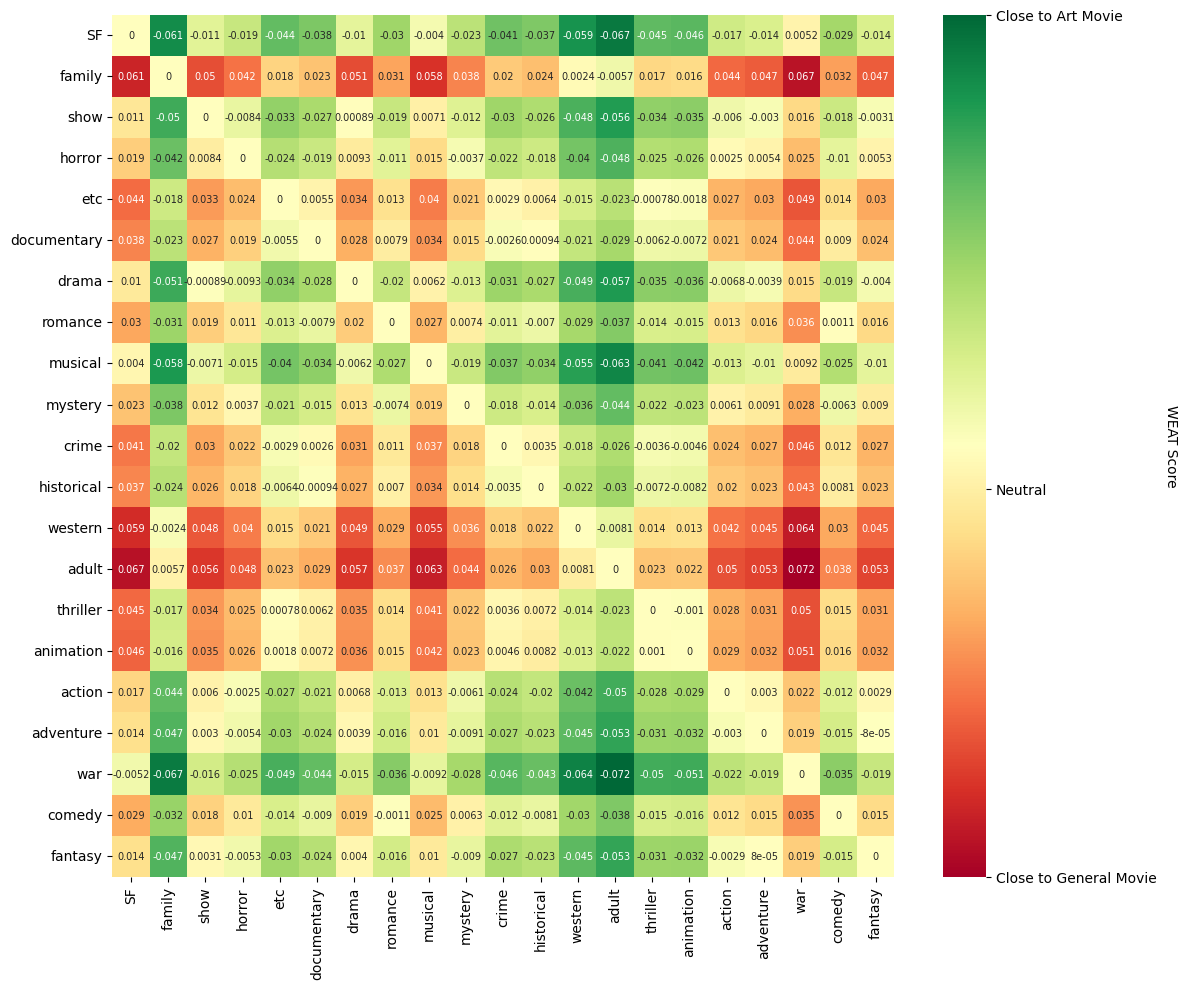

In [ ]:
# 히트맵 시각화
plt.figure(figsize=(12, 10))  # 그래프 크기 조절
ax = sns.heatmap(matrix, xticklabels=genre_names, yticklabels=genre_names, annot=True, cmap='RdYlGn_r', annot_kws={"size": 7})

# 색 범례 추가 및 설정
cbar = ax.collections[0].colorbar
cbar.set_label('WEAT Score', rotation=270, labelpad=15)
cbar.ax.invert_yaxis()  # 범례의 방향을 뒤집음

# 범례에 매칭 정보 추가
colorbar_labels = ['Close to General Movie', 'Neutral', 'Close to Art Movie']
cbar.set_ticks([cbar.vmax, 0.1 * cbar.vmax, cbar.vmin])  # 적절한 위치에 틱 설정
cbar.set_ticklabels(colorbar_labels)  # 틱 라벨 설정

# 히트맵 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

# 회고

GPT로 학습 과정에서 사용했던 코드를 객체화, 고도화하여 재사용가능한 형태로 그리고 가독성 높은 형태로 가공하는 방식으로 작업을 진행했다.

문제는 입력받은 데이터를 클래스 인스턴스로 처리하고, 지역변수 형태로 저장된 데이터를 다른 클래스나 외부 함수로 처리하는 과정에서 캡슐화된 데이터 처리 과정에서 문제가 생겼을때, 캡슐화 때문에 그 문제를 정확하게 알기 어려워 디버깅에 애를 먹었다.

결국 하루 종일 작업했던 것을 다 지우고, 학습 과정을 다시 되짚으면서 객체가 아니라 외부 함수 형태로 단위작업을 진행하고, 그것들의 결과를 확인하면서 다음 단계로 넘어가는 방식으로 코드를 재구성했다.

예를 들어서 처음 프로젝트를 했을 때에는 텍스트를 토크나이징하고 벡터화하는 부분까지를 한 클래스로 처리하고, 벡터화한 것으로부터 시각화에 필요한 매트릭스를 뽑는 것을 한 클래스로 처리해서 했는데, 결과적으로 매트릭스 값이 출력되지 않는 문제가 있었다.

단어 토크나이징부터 매트릭스 값을 뽑는 것까지 출력문을 동원해서 일일이 확인했지만, 각 작업들이 클래스 내의 지역번수들과 메서드 연산으로 수행되는 과정에서 각각의 단계들이 서로 맞물리는 의존성 수준이 너무 높아 결국 디버깅을 포기했다.

나중에 다시 작업을 하면서 확인한 점은 Word2Vec 임베딩을 만드는 과정에서 전체 시놉시스의 토크나이징을 처리하는 과정과 나머지 장르별 토큰 주머니를 만드는 프로세스가 다르다는 점이었다.

워드 임베딩 생성을 위한 텍스트 처리는 전체 문장과 그 문장에서 발골된 토큰 리스트를 쌍으로 매칭하는 구조인 반면, 나머지 장르별 토큰 주머니는 문장단위가 아니라 전체 텍스트로부터 하나의 단어 리스트를 뽑아내는  차이가 있었다.

처음 클래스 단위로 작업을 수행하는 코드에서 정확히 이 차이를 간과해서 문제가 생겼는지는 정확히 확인하지는 못했지만, 다시 코드를 작성하고 결과를 확인하면서 문제가 생기지는 않았다.

데이터의 입출력 뿐 아니라 벡터화와 같은, 처리 결과만 놓고 보면 직관적인 이해가 어려운 프로세스가 많이 개입된 머신러닝 작업에서는 캡슐화나 모듈화, 재사용성을 갖추기 이전에 실제로 프로세스가 잘 동작하는지 유닛 단위로 확인하고 전체 과정을 차근차근 되짚는 부분이 더 중요하다고 느껴졌다.

비 머신러닝 모델의 소프트웨어 구조를 다루는 데에도 물론 유닛 단위의 테스트와 이에 근거한 프로젝트 발전이 중요하겠지만, 데이터의 입출력과 서빙의 완결성, 속도 같은 것이 어느 정도 패키지나 라이브러리를 통해서 잘 갖춰져 있다는 점에서 머신러닝에 비하면 용이한 지점이 있다고 느꼈다.